# Scraping Top Repositories for Topics on GitHub

Introduction: 
- Introduction about web scraping

            Web scraping is the process of using bots to extract content and data from a website. web scraping extract
            HTML code and, with it, data stored in a database. The scraper can then replicate entire website content 
            elsewhere.

        
- Introduction about GitHub and the problem statement

            GitHub is a code hosting platform for version control and collaboration. 
            It lets you and others work together on projects from anywhere.  
                
            We are needed to extract information about the top repositories under all the featured topics on GitHub.
            This project collects that information and converts them into csv files that can be used later for anlytics 
            and other forms of preprocessing.
                
- Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)
    
        - Python
        - requests package
        - Beautiful Soup
        - Pandas



Here are the steps we'll follow:

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 25 repositories in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```

## Scrape the list of topics from Github

Explain how you'll do it.

- use requests to download the page
- user BS4 to parse and extract information
- convert to a Pandas dataframe

Let's write a function to download the page.

In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
topics_url = 'https://github.com/topics?page=2'

def get_topics_page():
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

- Here, first of all we get the URL of the web page we want to scrape using `requests.get()` function.
- Then we check if the page is actually extracted using the `response.status_code`. If that is not equal to 200
  then we throw an exception.
- After that we use the `BeautifulSoup` HTML parser to convert the `response` text to a HTML code.

In [76]:
doc = get_topics_page()

Let's create some helper functions to parse information from the page.

To get topic titles, we can pick `p` tags with the `class` as shown in the picture

 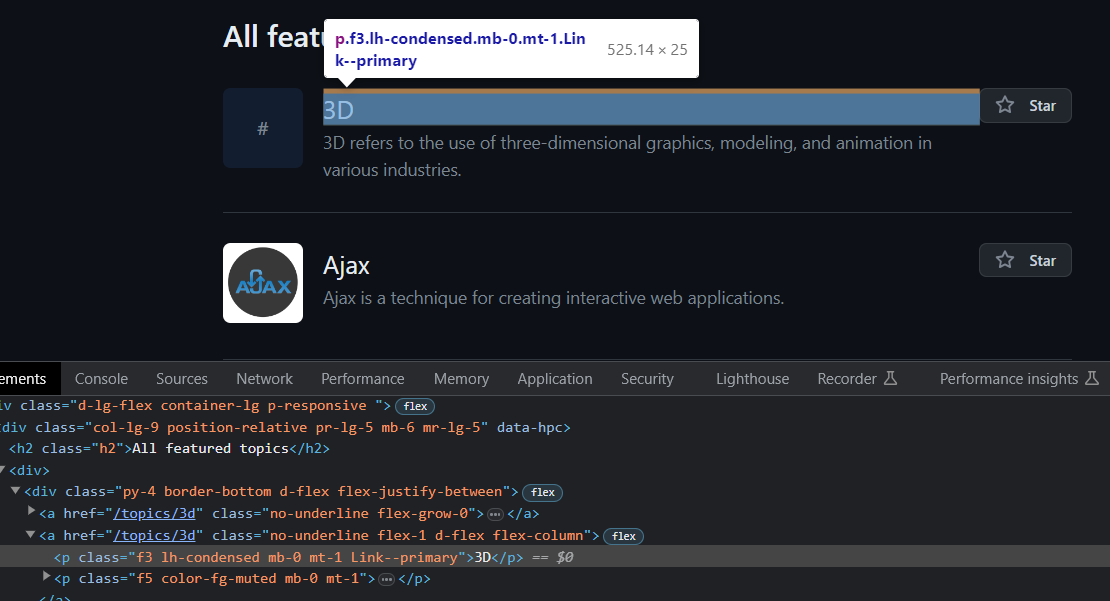

   

In [77]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

`get_topic_titles` can be used to get the list of titles

In [78]:
titles = get_topic_titles(doc)

In [79]:
print(titles)

['Cryptocurrency', 'Crystal', 'C#', 'CSS', 'Data structures', 'Data visualization', 'Database', 'Deep learning', 'Dependency management', 'Deployment', 'Django', 'Docker', 'Documentation', '.NET', 'Electron', 'Elixir', 'Emacs', 'Ember', 'Emoji', 'Emulator', 'ESLint', 'Ethereum', 'Express', 'Firebase', 'Firefox', 'Flask', 'Font', 'Framework', 'Front end', 'Game engine']


Similarly we have defined functions for descriptions and URLs.

In [80]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

In [81]:
def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-1 d-flex flex-column'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

Let's put this all together into a single function

In [82]:
def scrape_topics():
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

In [83]:
scrape_topics()

,title,description,url
0,Cryptocurrency,A cryptocurrency is a digital currency that us...,https://github.com/topics/cryptocurrency
1,Crystal,"Crystal is a self-hosted, general purpose prog...",https://github.com/topics/crystal
2,C#,"C# (""C sharp"") is an object-oriented and type-...",https://github.com/topics/csharp
3,CSS,Cascading Style Sheets (CSS) is a language use...,https://github.com/topics/css
4,Data structures,Data structures are a way of organizing and st...,https://github.com/topics/data-structures
5,Data visualization,Data visualization is the graphic representati...,https://github.com/topics/data-visualization
6,Database,A database is a structured set of data held in...,https://github.com/topics/database
7,Deep learning,Deep Learning is an artificial neural network ...,https://github.com/topics/deep-learning
8,Dependency management,Secure and manage your third-party dependencies.,https://github.com/topics/dependency-management
9,Deployment,Streamline your code deployment so you can foc...,https://github.com/topics/deployment


This function above gets the topic names,descriptions and the URLs of the topics from https://github.com/topics

## Get the top repositories from a topic page

As our next step, we will extract the top repositories for each topic on the topic page...
We use the URL of the topic page to get the required information.

In [84]:
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc


Next we will get the `a` tags for the username link and the repo name link. We use the parent `h3` tag for accessing the `a` tags.
    
   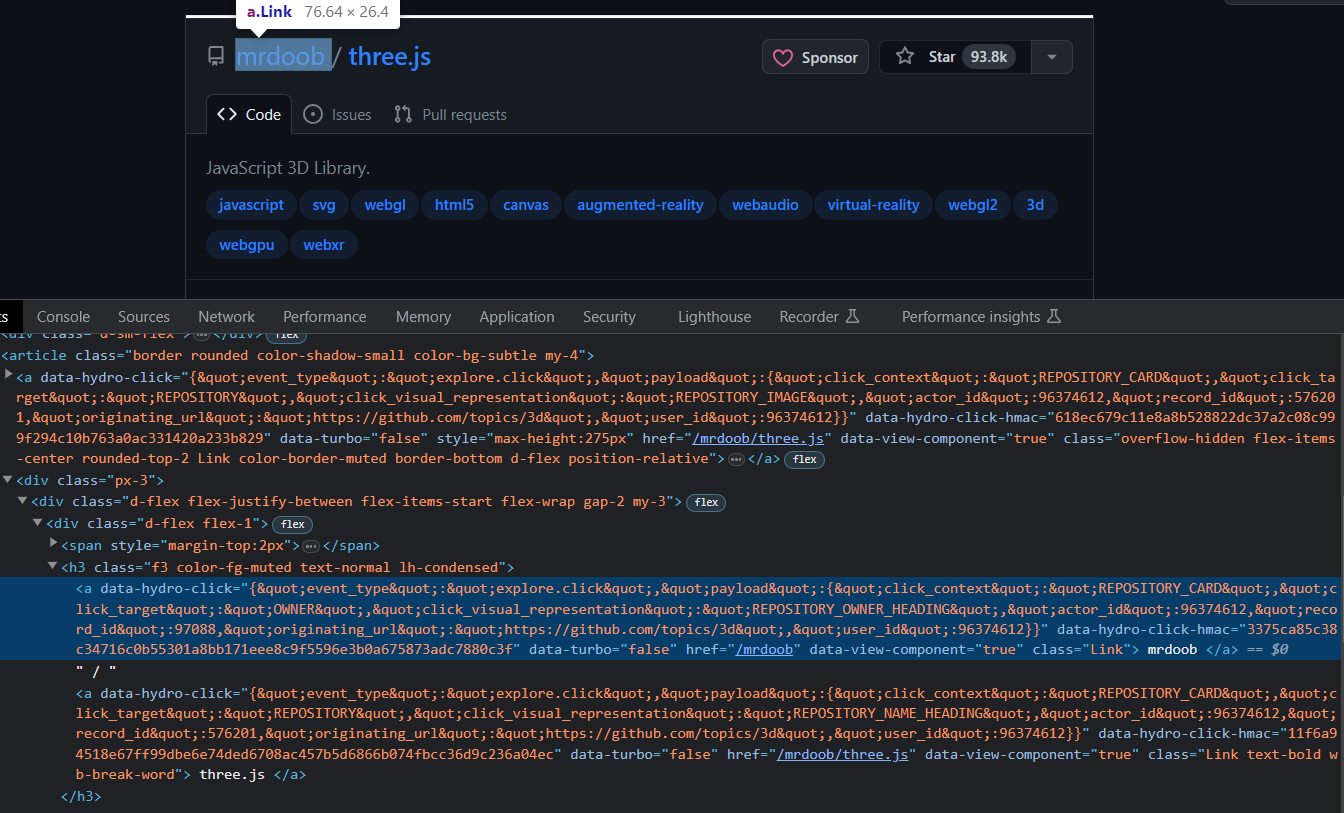
   

Here we extract the `repo_names`, `username` and `repo_url` from the `a_tags`.

In [85]:
def get_repo_info(h3_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  'https://github.com' + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

Here we convert the number of starts to a numeric(integer) format.

In [86]:
def parse_star_count(stars):
    stars=stars.strip()
    if stars[-1]=='k':
        return int(float(stars[:-1])*1000)
    return(int(stars))

Now, we put all the above functions together in this single function `get_topic_repos` and convert it into a pandas dataframe.

In [87]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    repo_tags = topic_doc.find_all('h3',{'class':'f3 color-fg-muted text-normal lh-condensed'})

    # Get star tags
    star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)

In the following helper function we call the above function, also putting a a check for if the .csv file already exists or not.

In [88]:
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

## Putting it all together

- We have a function to get the list of topics
- We have a function to create a CSV file for scraped repos from a topics page
- Let's create a function to put them together

In [89]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

Let's run it to scrape the top repos for the all the topics on the first page of https://github.com/topics

In [90]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "Cryptocurrency"
Scraping top repositories for "Crystal"
Scraping top repositories for "C#"
Scraping top repositories for "CSS"
Scraping top repositories for "Data structures"
Scraping top repositories for "Data visualization"
Scraping top repositories for "Database"
Scraping top repositories for "Deep learning"
Scraping top repositories for "Dependency management"
Scraping top repositories for "Deployment"
Scraping top repositories for "Django"
Scraping top repositories for "Docker"
Scraping top repositories for "Documentation"
Scraping top repositories for ".NET"
Scraping top repositories for "Electron"
Scraping top repositories for "Elixir"
Scraping top repositories for "Emacs"
Scraping top repositories for "Ember"
Scraping top repositories for "Emoji"
Scraping top repositories for "Emulator"
Scraping top repositories for "ESLint"
Scraping top repositories for "Ethereum"
Scraping top repositories for "Express"
Scraping top reposi

We can check that the CSVs were created properly

In [91]:
# read and display a CSV using Pandas
pd.read_csv('data/Amazon Web Services.csv')

,username,repo_name,stars,repo_url
0,bregman-arie,devops-exercises,57900,https://github.com/bregman-arie/devops-exercises
1,localstack,localstack,48400,https://github.com/localstack/localstack
2,serverless,serverless,45200,https://github.com/serverless/serverless
3,donnemartin,data-science-ipython-notebooks,25600,https://github.com/donnemartin/data-science-ip...
4,sst,sst,17600,https://github.com/sst/sst
5,pulumi,pulumi,17400,https://github.com/pulumi/pulumi
6,kubernetes-sigs,kubespray,14400,https://github.com/kubernetes-sigs/kubespray
7,aws,aws-cli,14300,https://github.com/aws/aws-cli
8,ramitsurana,awesome-kubernetes,14200,https://github.com/ramitsurana/awesome-kubernetes
9,getsops,sops,13800,https://github.com/getsops/sops


In [92]:
import jovian

In [93]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lordsurya445/scraping-github-topics-repositories" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/lordsurya445/scraping-github-topics-repositories


'https://jovian.com/lordsurya445/scraping-github-topics-repositories'

## References and Future Work

Summary of what we did

- We used Python and it's modules `Beautiful Soup` to scrape for data from https://github.com/topics to display the popular       topics and their most starred repositories.
- We extracted the information in the form of `.csv` files, which in the future will help in analysing the data.


References to links found useful

- https://github.com/topics
- https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
 
Ideas for future work

- Here we scraped only the first page of the featured github topics. For other pages we can change the base url by adding
  `?page=2` at the end.
- We can also scrape information from other sites like https://youtube.com or https://www.imdb.com and then maybe use the 
  `.csv` files in a ML model for analysis in the future.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>